### EDA

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/home/bbm/Documents/projects/MachineLearningRating_v3.csv")

# 1. Data Summarization
print("Dataset Info:")
print(data.columns)
print("\nDescriptive Statistics:")
# print(data.describe())

Dataset Info:
Index(['UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims'], dtype='object')

Descriptive Statistics:


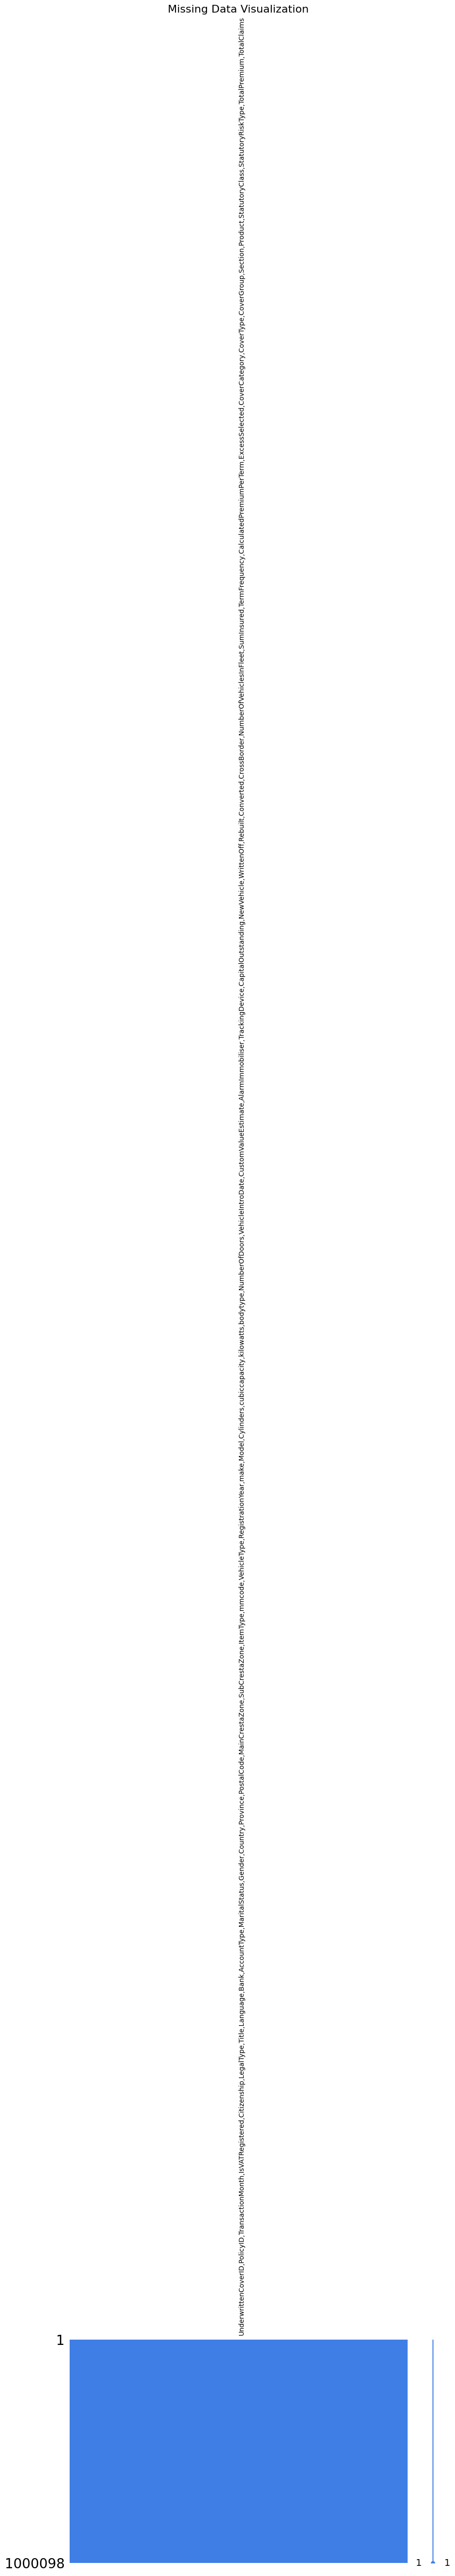

In [17]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data, figsize=(10, 6), color=(0.25, 0.5, 0.9))  # Adjust size and color
plt.title("Missing Data Visualization", fontsize=16)

plt.xticks(
    range(data.shape[1]),          
    data.columns,                  
    rotation=90, fontsize=10        
)
plt.show()